# Probability And Statistics Term Project
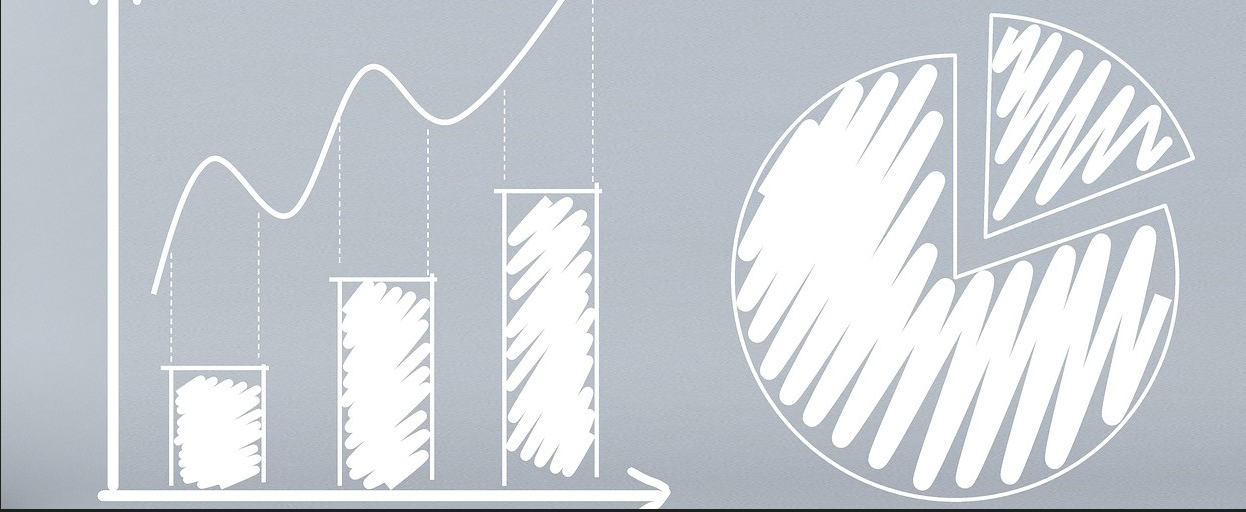

## Project : Apply Hypothesis Testings And Other Statistical Methods To Analyze The `Diabetes` Dataset Collected Via Random Sampling.
**Sampling was performed using a google form provided below:**

https://docs.google.com/forms/d/e/1FAIpQLSfx73whtx3bm8-W3BJ3fo7lYNCE2v3OJuH3YTpGYpEz5BezYw/viewform


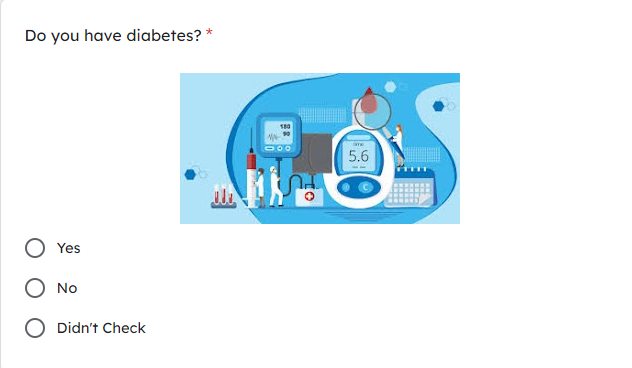

### Group Members
1. `Abdullah Yousaf`
2. `Awais`
3. `Abdul Rehman`


In [86]:
#Some important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import scipy
import scipy.stats
from scipy.stats import norm,t
from statsmodels.stats.proportion import proportions_ztest

In [88]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [156]:
#Load dataset
df=pd.read_csv("Diabetes (Responses).csv")
df.head()

,Timestamp,Enter your full name.,Gender.,Enter your Age in years.,Enter your weight in kg.,Select your height in feet and inches.,Do you have diabetes?,"Do you have any other major disease (syndrome, arthritis, liver, kidney, lungs etc. problem)?",What is your average fasting (not eating overnight) Blood Sugar level (mg/dl)?,Do you have a history of diabetes in your family?,How often you do any physical exercise?,"How often do you eat junk food in a week (carbonated drinks, burgers etc.)?"
0,12/16/2022 0:02:50,Ukasha Altaf,Prefer not to say,18,57,"5' 10""",Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,Once
1,12/16/2022 0:04:18,Amna ali,Female,19,48,"5' 5""",No,No,Normal (i.e. 70 - 99),No,Occasionally,Twice
2,12/16/2022 0:05:30,Muzammil Kz,Male,19,65,"6' 0""",Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,More than twice
3,12/16/2022 0:07:19,Farhan Akbar Bughio,Male,19,60,"5' 4""",No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Twice
4,12/16/2022 0:08:29,Emama Nugman,Female,18,69,"5' 4""",No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Once


### Project Task 1. Data cleaning
1. It is understood that the name column would not help us in our analysis hence lets drop it
2. Similarly we don't need the column named(Timestamp)
3. change the names of columns for simplicity
2. Lets try to convert Height column from string to int

In [157]:
#drop column Timestamp and Enter your full name.
df=df.drop(['Timestamp','Enter your full name.'],axis=1)

In [158]:
#change column names
change_names={'Gender.':'gender',
    'Enter your Age in years.':'age',
             'Enter your weight in kg.':'weight(kg)',
             'Select your height in feet and inches.':'height(ft)',
             'Do you have diabetes?':'diabetic',
             'Do you have any other major disease (syndrome, arthritis, liver, kidney, lungs etc. problem)?':'other major disease',
             'What is your average fasting (not eating overnight) Blood Sugar level (mg/dl)? ':"Sugar_level(mg/dl)",
             'Do you have a history of diabetes in your family? ':'family history of diabetes',
             'How often you do any physical exercise? ':'physical exercise',
             'How often do you eat junk food in a week (carbonated drinks, burgers etc.)?':'junk_food consumption per week'}

df = df.rename(columns=change_names)

In [159]:
df.head()

,gender,age,weight(kg),height(ft),diabetic,other major disease,Sugar_level(mg/dl),family history of diabetes,physical exercise,junk_food consumption per week
0,Prefer not to say,18,57,"5' 10""",Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,Once
1,Female,19,48,"5' 5""",No,No,Normal (i.e. 70 - 99),No,Occasionally,Twice
2,Male,19,65,"6' 0""",Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,More than twice
3,Male,19,60,"5' 4""",No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Twice
4,Female,18,69,"5' 4""",No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Once


In [160]:
#change datatype of height column
from decimal import Decimal

def height_dt(x):
    if len(x)>6:
        x=x[:len(x)-2] 
    x=x[:len(x)-1]
    x1=x.split("' ")[0]
    x2=x.split("' ")[1]
    x2=int(x2)/12
    x=int(x1)+x2
    x = Decimal(x).quantize(Decimal('0.00'))
    return x

In [161]:
df['height(ft)']=df['height(ft)'].apply(height_dt)

In [162]:
df.head()

,gender,age,weight(kg),height(ft),diabetic,other major disease,Sugar_level(mg/dl),family history of diabetes,physical exercise,junk_food consumption per week
0,Prefer not to say,18,57,5.83,Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,Once
1,Female,19,48,5.42,No,No,Normal (i.e. 70 - 99),No,Occasionally,Twice
2,Male,19,65,6.00,Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,More than twice
3,Male,19,60,5.33,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Twice
4,Female,18,69,5.33,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Once


### Feature Engineering
**Body Mass Index (BMI) = weight in kilograms divided by the square of height in meters.**
1. change height from ft to meter
2. apply formula

In [163]:
df['height(ft)']=df['height(ft)'].astype('float')
df['height(ft)'].dtype

dtype('float64')

In [164]:
#height feet to meter
df['height(m)']=df['height(ft)']/3.281
df=df.drop('height(ft)',axis=1)
#bmi calculation
df['BMI']=df['weight(kg)']/((df['height(m)']**2))

In [165]:
df['BMI']=round(df['BMI'], 2)
df['height(m)']=round(df['height(m)'], 2)

In [166]:
df.head()

,gender,age,weight(kg),diabetic,other major disease,Sugar_level(mg/dl),family history of diabetes,physical exercise,junk_food consumption per week,height(m),BMI
0,Prefer not to say,18,57,Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,Once,1.78,18.05
1,Female,19,48,No,No,Normal (i.e. 70 - 99),No,Occasionally,Twice,1.65,17.59
2,Male,19,65,Didn't Check,No,Normal (i.e. 70 - 99),No,Occasionally,More than twice,1.83,19.44
3,Male,19,60,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Twice,1.62,22.74
4,Female,18,69,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Once,1.62,26.15


In [167]:
#remove outliers with (interquartile range method)
def outlier_remover(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            print(col)
            if lower<0:
                lower=0
            print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
            print(lower ,">",col,"<",upper)
            plt.figure(figsize=(15,5))
            g=sns.boxenplot(df[col],width=0.3)
            plt.show()
            df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df

age
Q1 =  19.0  Q3 =  45.0  IQR =  26.0
0 > age < 84.0


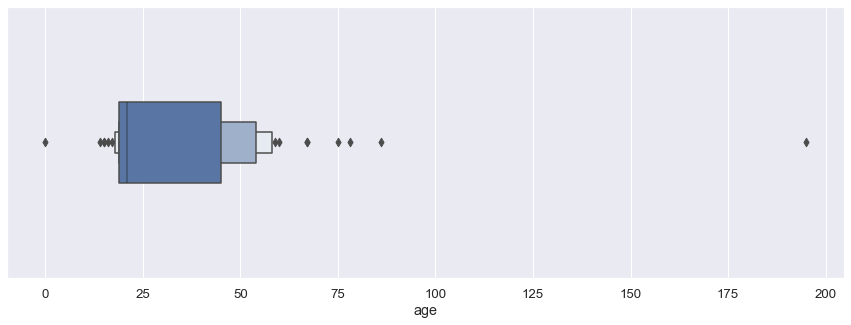

weight(kg)
Q1 =  51.0  Q3 =  73.5  IQR =  22.5
17.25 > weight(kg) < 107.25


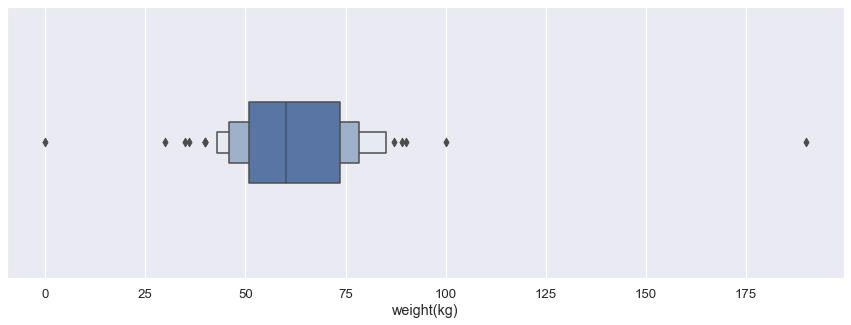

height(m)
Q1 =  1.6  Q3 =  1.73  IQR =  0.1299999999999999
1.4050000000000002 > height(m) < 1.9249999999999998


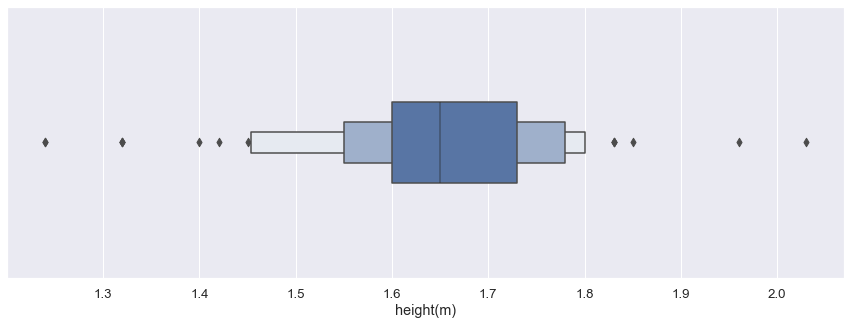

BMI
Q1 =  19.125  Q3 =  25.455  IQR =  6.329999999999998
9.630000000000003 > BMI < 34.949999999999996


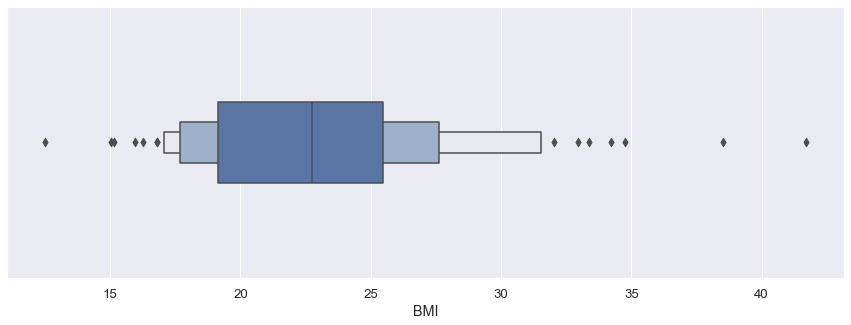

In [168]:
df=outlier_remover(df)

In [169]:
len(df)

106

### Project Task 2. some common statistics

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          106 non-null    object 
 1   age                             106 non-null    int64  
 2   weight(kg)                      106 non-null    int64  
 3   diabetic                        106 non-null    object 
 4   other major disease             106 non-null    object 
 5   Sugar_level(mg/dl)              106 non-null    object 
 6   family history of diabetes      106 non-null    object 
 7   physical exercise               106 non-null    object 
 8   junk_food consumption per week  106 non-null    object 
 9   height(m)                       106 non-null    float64
 10  BMI                             106 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 9.9+ KB


In [171]:
df.describe()

,age,weight(kg),height(m),BMI
count,106.000000,106.000000,106.000000,106.000000
mean,31.735849,62.688679,1.663585,22.632925
std,15.884285,13.001365,0.087322,4.527713
min,14.000000,30.000000,1.450000,12.510000
25%,19.000000,53.000000,1.600000,19.095000
50%,21.000000,60.000000,1.650000,22.735000
75%,45.000000,72.000000,1.730000,25.322500
max,78.000000,90.000000,1.850000,34.760000


In [172]:
df['diabetic'].value_counts()

No              55
Yes             43
Didn't Check     8
Name: diabetic, dtype: int64

**Here we can see that data is almost unbiased with respect to diabetic column which is our target column**

### Project Task 3. Make Frequency Distribution table for numberical data

In [173]:
sns.set(font_scale=1.5)
def freq_dist(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            g=np.histogram(df[col],bins=5,density=False)
            col1=[]
            col2=[]
            for i in range(len(g[0])):
                col1.append(g[0][i])
                col2.append(f'{round(g[1][i],2)} - {round(g[1][i+1],2)}')
            l=pd.DataFrame({f'{col}_distribution':col2,'freq':col1})
            l.set_index(f'{col}_distribution', inplace=True)
            display(l)
            sns.displot(df[col], kde=True,bins=5).set(title=col)
            plt.show()
            print("----------------------------------------------------------------------------------------------------")

,freq
age_distribution,
14.0 - 26.8,60
26.8 - 39.6,11
39.6 - 52.4,21
52.4 - 65.2,10
65.2 - 78.0,4


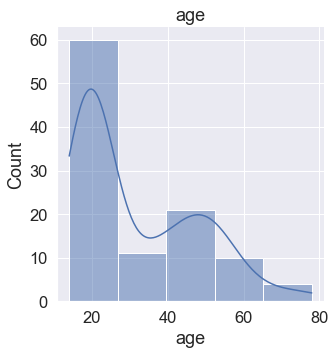

----------------------------------------------------------------------------------------------------


,freq
weight(kg)_distribution,
30.0 - 42.0,4
42.0 - 54.0,25
54.0 - 66.0,35
66.0 - 78.0,25
78.0 - 90.0,17


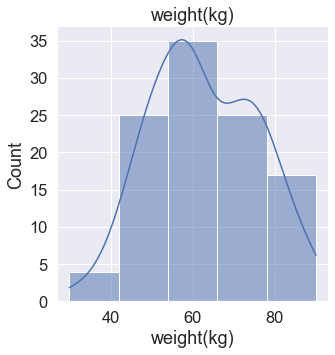

----------------------------------------------------------------------------------------------------


,freq
height(m)_distribution,
1.45 - 1.53,5
1.53 - 1.61,28
1.61 - 1.69,30
1.69 - 1.77,27
1.77 - 1.85,16


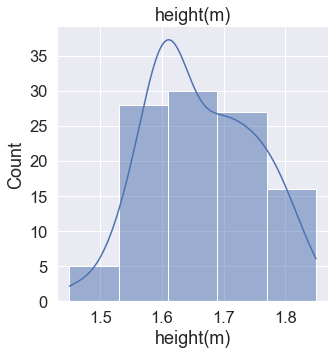

----------------------------------------------------------------------------------------------------


,freq
BMI_distribution,
12.51 - 16.96,7
16.96 - 21.41,40
21.41 - 25.86,36
25.86 - 30.31,16
30.31 - 34.76,7


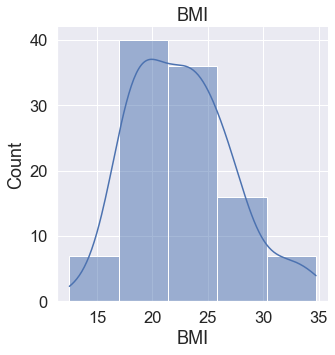

----------------------------------------------------------------------------------------------------


In [174]:
freq_dist(df)

**As it can be observed that only(weight,height,BMI) parameters are showing bell curve and age column is  negatively skewed some how**

### Project Task 4. Different graphs to show relation between differrnt parameters

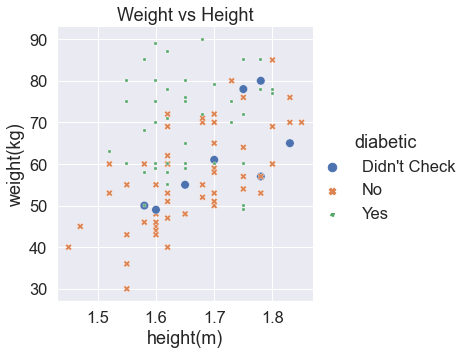

In [175]:
 #lets check the relation of height and weight with diabetic or not 
sns.relplot(x='height(m)',y='weight(kg)',data=df,hue='diabetic',size='diabetic',style='diabetic').set(title='Weight vs Height');

**By just observing the graph, it is concluded that there is a weak positive correlation between weight and height which we will see later**

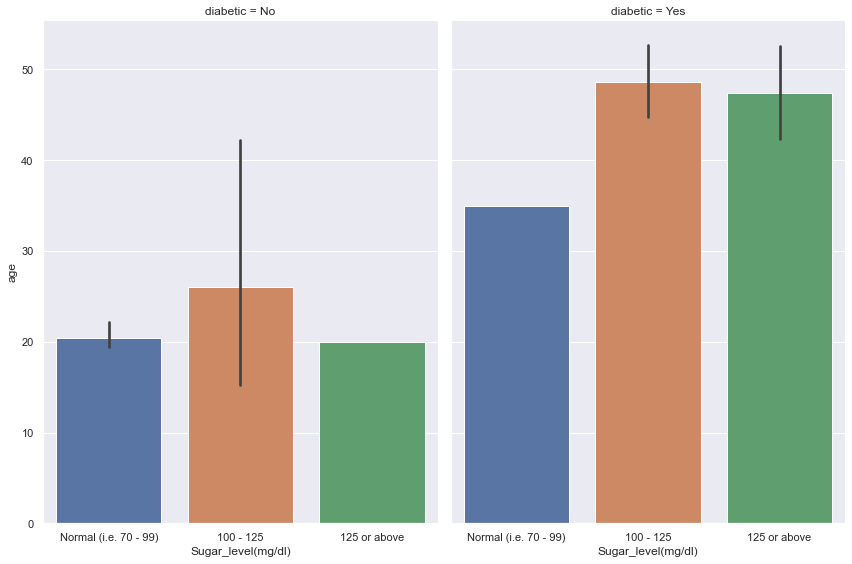

In [179]:
#compare sugarlevel with age separated by diabetic factor
sns.set(font_scale=1)
dg=df[df['diabetic']!="Didn't Check"]
sns.catplot(
    data=dg, x="Sugar_level(mg/dl)", y="age", col="diabetic",
    kind="bar", height=8, aspect=0.75,
);

**Conclusions**
1. from left most bar chart we found that young public that (haven't checked diabetics) have almost normal sugar level
2. the middle barchart show that there is a public which is not suffering from diabeties can have varied sugar_level
3. lastly those who has sugar level (100-125) suffer more from diabeties
4. sum rough conclusions have been found will check all of them thoroughly.

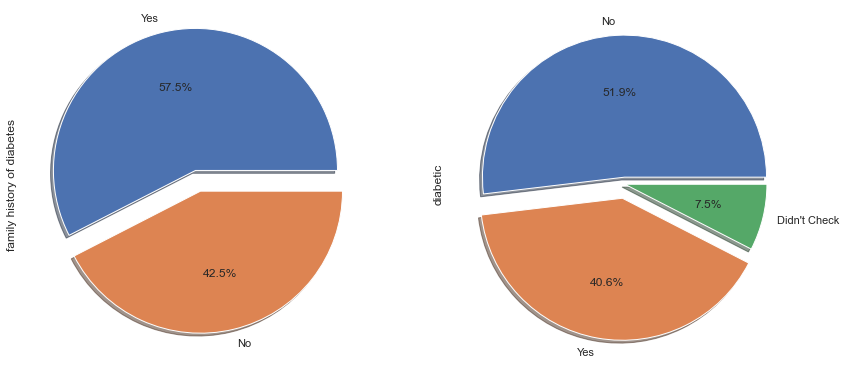

In [180]:
#lets have a look on the number of people with different diabetic status and ratio of people with family history of diabetis
#lets look them individually then will compare them with a single plot
fig, ax = plt.subplots(1,2,figsize=(14,14))
plt.subplot(1, 2, 1)
df['family history of diabetes'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=[0.1,0.05])
plt.subplot(1, 2, 2)
df['diabetic'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=[0.05,0.1,0]);

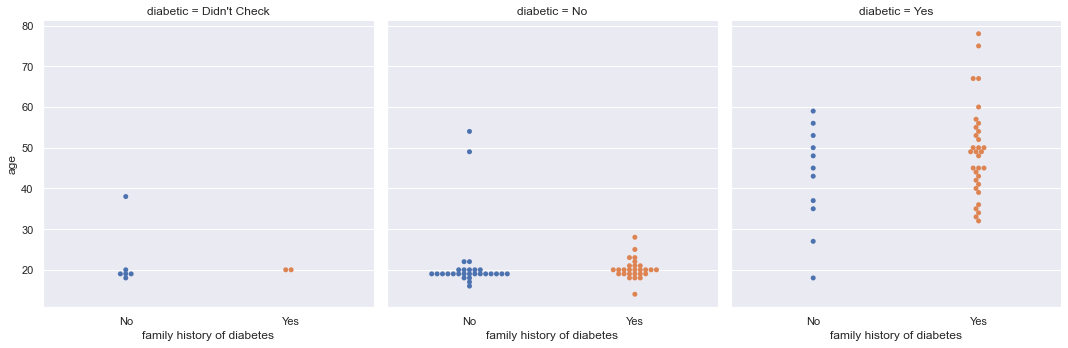

In [181]:
#lets compare both along with age
sns.catplot(x='family history of diabetes',y='age', col='diabetic',data=df,kind="swarm")
# Show the plot
plt.show()

**As we all know diabeties is found more in elder (this will be proved in hypothesis testing) we can see in the third (right most) graph that the persons with family history and higher age are more effected with diabeties**

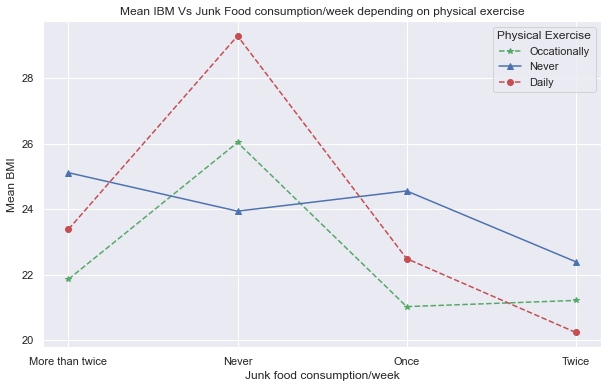

In [219]:
#time to check relation of physical activity, bmi, and junk food
fig,ax=plt.subplots(figsize=(10,6))
df1=df[df['physical exercise']=='Occasionally']
df2=df[df['physical exercise']=='Never']
df3=df[df['physical exercise']=='Daily']
occ=pd.DataFrame(df1.groupby('junk_food consumption per week')['BMI'].mean())
never=pd.DataFrame(df2.groupby('junk_food consumption per week')['BMI'].mean())
daily=pd.DataFrame(df3.groupby('junk_food consumption per week')['BMI'].mean())
ax.plot(occ.index,occ['BMI'],marker='*',linestyle='--',label='Occationally',color='g');
ax.plot(never.index,never['BMI'],marker='^',label='Never',color='b');
ax.plot(daily.index,daily['BMI'],'--ro',label='Daily');
plt.legend(title="Physical Exercise",fancybox=True);
plt
plt.title('Mean IBM Vs Junk Food consumption/week depending on physical exercise');
plt.xlabel('Junk food consumption/week')
plt.ylabel('Mean BMI')
plt.show()

**Have not found any important relationship but it is being observed that daily physical exercise with no junk found has high BMI**

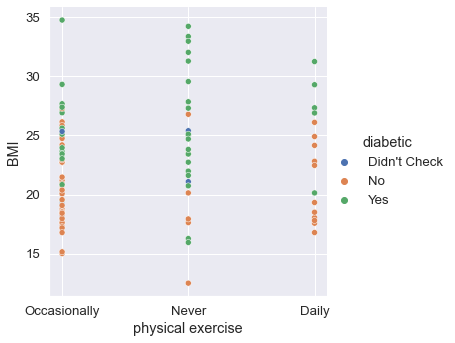

In [113]:
#lets check a final relationship between BMI, and physical exercise hue by diabatic 
sns.relplot(x='physical exercise',y='BMI',hue='diabetic',data=df);

**As we can see that the people who never do physical exercise are more likely to have diabetic and high BMI because of weight gain ##-> BMI=weight/(height^2) hence there is a strong chances of high weight if someone has high BMI**

### Project Task 5. Some tables

In [114]:
#relation of gender,diabetics and age
diab=df[df['diabetic']=='Yes']
table = diab.pivot_table(index=['gender', 'family history of diabetes'], values='diabetic', aggfunc='count')

In [115]:
table

diabetic
gender family history of diabetes          
Female No                                 5
       Yes                               10
Male   No                                 6
       Yes                               22

**For both `male` and `female` those who has `family history of diabetics` are more diabetics e.g. `21 females are diabetic which is greater than 5` similarly `22 males are diabetic which is greater than 6`**

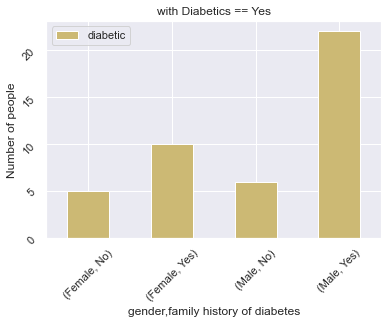

In [224]:
table.plot(kind='bar',color='y')
plt.title('with Diabetics == Yes')
plt.tick_params(rotation=45)
plt.ylabel("Number of people")
plt.show()

In [117]:
##check states of sugar level and junk food consumption per week depending on those who never do physical exercise 
never_phy=df[df['physical exercise']=='Never']
table1=never_phy.pivot_table(index=['Sugar_level(mg/dl)','junk_food consumption per week'],values='physical exercise',aggfunc='count')

In [118]:
table1

physical exercise
Sugar_level(mg/dl)    junk_food consumption per week                   
100 - 125             Never                                           3
                      Twice                                           3
125 or above          More than twice                                 5
                      Never                                           4
                      Once                                            7
                      Twice                                           2
Normal (i.e. 70 - 99) More than twice                                 3
                      Once                                            2
                      Twice                                           1

**For those who don't do `exercise` and `eat junk food` are more likely to cross `normal sugar level`**

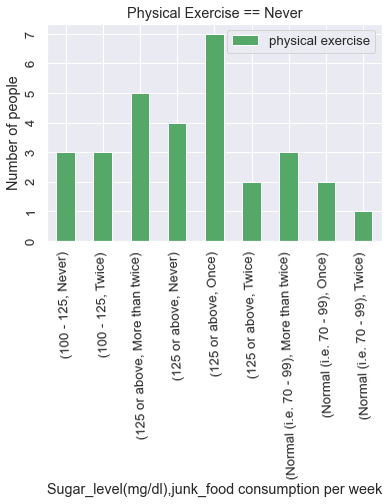

In [119]:
table1.plot(kind='bar',color='g')
plt.title("Physical Exercise == Never")
plt.tick_params(rotation=92)
plt.ylabel("Number of people")
plt.show()

### Project Task 6. Correlations
 correlation refers to the relationship between two variables and how they are related to each other. A correlation coefficient is a measure of the strength and direction of the relationship between two variables. It can range from -1 to 1, where -1 indicates a strong negative relationship, 0 indicates no relationship, and 1 indicates a strong positive relationship.

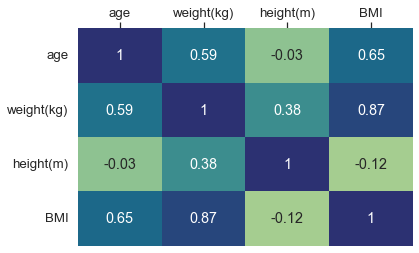

In [120]:
#correlation
df_corr=df.corr()
ax=sns.heatmap(df_corr,cmap="crest",annot=True,cbar=False)
ax.xaxis.tick_top()

**Look at weight and height when we drew the scatterplot for weight and height we had found that there is a weak correlation between them and here we can see they have 0.4 correlation**

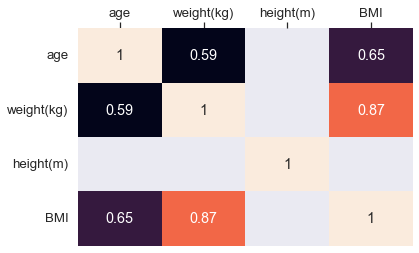

In [121]:
#relation those are strong positive correlations
#lets consider strong positive means>0.55
ax=sns.heatmap(df_corr[df_corr>0.55],annot=True,cbar=False)
ax.xaxis.tick_top()

**Strong linear relationships**
1. BMI-weight (0.86)
2. BMI-age (0.64)
2. weight-age(0.58)

### Project Task 7. Hypothesis testing

## 1
1. Diabetic people are obese as compared to normal people
--According to the World Health Organization (WHO), around 80% of people with type 2 diabetes are overweight or obese.

* H0 : p = the proportion of people with diabetes are overweight = 0.80
* H1 : p != the proportion of people with diabetes are overweight !=0.80

In [122]:
#lets separate the data with diabetic =Yes
diab=df[df['diabetic']=='Yes']
#number of heavy weight 
#consider overweight where BMI >25
overweight=diab[diab['BMI']>25]
#proportion of overweight
prop_overweight=round(len(overweight)/len(diab),2)

In [123]:
prop_overweight

0.53

#### This is a hypothesis testing for proportion we will use z distribution
z=(sample_stat-hypoth.param.value)/standard_error

standard_error=> will be calculated using bootstrap distribution 

why not using standard deviation but are using standard error?

 standard deviation is a useful measure of dispersion, but it can be sensitive to the presence of outliers and 
    may not always accurately represent the distribution of the data. The bootstrap distribution, on the other hand, 
    can be a more robust measure of dispersion and can be used to quantify the uncertainty in a statistic.
* will check it for alpha = 0.05
* this is a two tailed hypothesis testing so lets start..

In [124]:
#bootstap distribution for standard error
so_boot_distn=[]
for i in range(1000):
    so_boot_distn.append(
    np.mean(
    diab.sample(frac=1,replace=True)['BMI']
    )
    )
#standard error
std_error=np.std(so_boot_distn,ddof=1)

In [125]:
std_error

0.6573630826343734

In [126]:
#calculate z_score
z=round((prop_overweight-0.80)/std_error,2)
z

-0.41

In [127]:
#lets calculate p_value
p=norm.cdf(z,loc=0,scale=1)
#because it is two tail
p=p*2

In [128]:
p

0.6818059475446452

### Conclusions  (1)
#### As p is much much greater than alpha (a) 0.69>0.05 
1. we fail to reject H0 (H0 -> the proportion of people with diabetes are overweight = 80)
2. it proves that we have sufficient evidence to support the claim / result by WHO

**------------------------------------------------------------------------------------------------------------------------**

## 2
2. Those who don't have diabetes are more likely to have a mean BMI < 20

* H0 : mu = 20
* H1 : mu <20

#### This is a hypothesis testing for mean we will use t distribution (because population standard deviation is unknown)
t=(sample_stat-hypoth.param.value)/standard_error

standard_error=> will be calculated using bootstrap distribution 
* will check it for alpha = 0.05
* this is a left tailed hypothesis testing so lets start..

In [129]:
#separate those who don't have diabeties
non_diab=df[df['diabetic']=='No']
#sample_mean
sample_mean=round(non_diab['BMI'].mean(),2)
sample_mean

20.5

In [130]:
#bootstap distribution for standard error
so_boot_distn=[]
for i in range(1000):
    so_boot_distn.append(
    np.mean(
    non_diab.sample(frac=1,replace=True)['BMI']
    )
    )
#standard error
std_error=np.std(so_boot_distn,ddof=1)

In [131]:
std_error

0.43939957697950804

In [132]:
#calculate t statistic
T=round((sample_mean-20)/std_error,2)
T

1.14

In [133]:
#p_value
p=t.cdf(T,df=(len(non_diab)-1))
p

0.8703411868497081

### Conclusions  (2)
#### As p is much much greater than alpha (a) 0.87>0.05 
1. we fail to reject H0 (H0 -> mu = 20)
2. it proves that there is no sufficient evidence to support the claim (claim -> Those who don't have diabetes are more likely to have a mean BMI < 20)

**------------------------------------------------------------------------------------------------------------------------**

## 3
3. Diabetes is found more in the age group greater than 19
lets consider age group < 19 = child and > 19 = adult


* H0 : p_child = p_adult
-> H0 : p_child - p_adult = 0

* H1 : p_adult > p_child
-> H1: p_child - p_adult < 0
    
**assuming null hypothesis True**

z = (p1 - p2) / sqrt(p * (1 - p) * (1/n1 + 1/n2))

Where p1 and p2 are the proportions of the first and second samples, p is the pooled proportion, n1 and n2 are 
the sample sizes, and sqrt() represents the square root function. This test statistic is 
used to determine the likelihood of obtaining the observed result if the null hypothesis is true.
* alpha =0.05
**But we can use `from statsmodels.stats.proportion import proportions_ztest` to find it**

In [134]:
# Number of children with diabetes
n1 = len(diab[diab['age']<=19])

# Number of adults with diabetes
n2 = len(diab) - n1

# Total number of children
N1 = len(df[df['age']<=19])

# Total number of adults
N2 = len(df) - N1

In [135]:
n1,n2,N1,N2

(1, 42, 34, 72)

In [136]:
#finding for p_child < p_adult
z_stat, p_value = proportions_ztest(count=[n1 , n2], nobs=[N1, N2], alternative='smaller')
z_stat,p_value

(-5.421287171092211, 2.9585707729615014e-08)

### Conclusions  (3)
#### As p is much much smaller than alpha (a) 2.95 x 10^-8 < 0.05 
1. we reject H0 (p_child = p_adult)
2. it proves that there is sufficient evidence to support the claim (claim -> Diabetes is found more in the age group greater than 19)
**------------------------------------------------------------------------------------------------------------------------**

## 4
4. those who are diabetic are more likely to have a family history of diabetes than the normal people

* H0 : p = the proportion of people with family history and diabeties = 0.50
* H1 : p != the proportion of people with family history and diabeties > 0.5

#### This is a hypothesis testing for proportion we will use z distribution


* will check it for alpha = 0.10
* this is a right tailed hypothesis testing so lets start..

In [220]:
# Number of individuals who has family history of diabeties
n1 = len(diab[diab['family history of diabetes']=='Yes'])

# Number of individuals who do not has family history of diabeties
n2 = len(diab)-n1

# Total number of individuals
N = n1 + len(diab)

# Perform the proportion hypothesis test
z_stat, p_value = proportions_ztest(n1, N, value=0.5, alternative='larger')
p_value=1-p_value

In [221]:
p_value

0.09956110870429491

### Conclusions  (4)
#### As p is much much greater than alpha (a) 0.099>0.10 
1. we reject H0 (H0 ->  p = the proportion of people with family history and diabeties = 0.50)
2. it proves that there is sufficient evidence to support the claim (claim -> those who are diabetic are more likely to have a family history of diabetes than the normal people)

**------------------------------------------------------------------------------------------------------------------------**

### Project Task 8. Make Data ready for Machine Learning Model
1. Drop didn't check value in target column
2. check null values
3. different data types to numeric
4. split dataset

In [139]:
#drop all rows with didn't check value in target column
df=df[df['diabetic']!="Didn't Check"]
df.head()

,gender,age,weight(kg),diabetic,other major disease,Sugar_level(mg/dl),family history of diabetes,physical exercise,junk_food consumption per week,height(m),BMI
1,Female,19,48,No,No,Normal (i.e. 70 - 99),No,Occasionally,Twice,1.65,17.59
3,Male,19,60,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Twice,1.62,22.74
4,Female,18,69,No,No,Normal (i.e. 70 - 99),Yes,Occasionally,Once,1.62,26.15
5,Male,23,80,No,No,Normal (i.e. 70 - 99),Yes,Never,Once,1.73,26.79
6,Male,18,70,No,No,Normal (i.e. 70 - 99),Yes,Daily,More than twice,1.68,24.91


In [140]:
len(df)

98

In [141]:
#check null values
df.isna().sum()

gender                            0
age                               0
weight(kg)                        0
diabetic                          0
other major disease               0
Sugar_level(mg/dl)                0
family history of diabetes        0
physical exercise                 0
junk_food consumption per week    0
height(m)                         0
BMI                               0
dtype: int64

**No null values**

In [142]:
pd.options.mode.chained_assignment = None

In [143]:
#other to numeric
def preprocess(df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label]=pd.Categorical(content).codes
    return df
df=preprocess(df)


In [144]:
df.head()

,gender,age,weight(kg),diabetic,other major disease,Sugar_level(mg/dl),family history of diabetes,physical exercise,junk_food consumption per week,height(m),BMI
1,0,19,48,0,0,2,0,2,3,1.65,17.59
3,1,19,60,0,0,2,1,2,3,1.62,22.74
4,0,18,69,0,0,2,1,2,2,1.62,26.15
5,1,23,80,0,0,2,1,1,2,1.73,26.79
6,1,18,70,0,0,2,1,0,0,1.68,24.91


In [145]:
#spilt data
X=df.drop('diabetic',axis=1)
y=df['diabetic']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [146]:
len(x_train)

78

### Project Task 9. Apply Machine Learning Models
* we will use build-in models in sklearn library

In [147]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def model_check(y,y_pred):
    print("Accuracy : ",accuracy_score(y,y_pred))
    sns.heatmap(confusion_matrix(y,y_pred),cmap="crest",annot=True,cbar=False)
    print(classification_report(y,y_pred))

In [148]:
#Model one logistic regression
np.random.seed(70)
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression(solver='lbfgs', max_iter=1000)
m1.fit(x_train,y_train);

Accuracy :  0.85
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



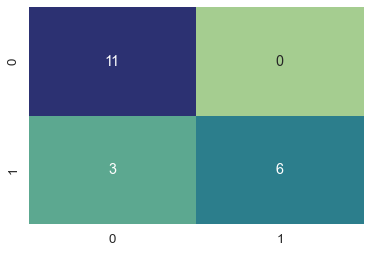

In [149]:
model_check(y_test,m1.predict(x_test))

**As we can see that we have got 90% accuracy and a good f1_score with less number of wrong prediction**

In [150]:
#lets try an bagging algorithm
np.random.seed(70)
from sklearn.ensemble import RandomForestClassifier
m2=RandomForestClassifier()
m2.fit(x_train,y_train);

In [151]:
m2.score(x_train,y_train)

1.0

Accuracy :  0.8
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.56      0.71         9

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



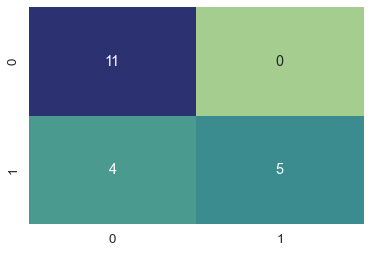

In [152]:
model_check(y_test,m2.predict(x_test))

### Project Task 10. some conclusions for ML model

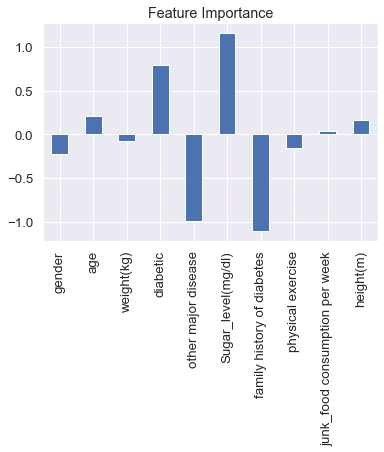

In [153]:
#lets check feature importance for model 1 (Logistic Regression)
features_dict=dict(zip(df.columns,m1.coef_[0]))
features=pd.DataFrame(features_dict,index=[0])
features.T.plot.bar(title='Feature Importance',legend = False);

# Thanks for visiting our project